In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
diabete_df=pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
#Cleaning_data
#There were no Null_Values in the DataSet
#To understand How Many Rows are duplicated
diabete_df.duplicated(subset=['Diabetes_012','HighBP','HighChol','CholCheck','BMI','Smoker','Stroke',
                              'HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','GenHlth','MentHlth',
                              'PhysHlth','DiffWalk','Sex','Age','Education','Income']).sum()

23899

In [4]:
#clean duplicated rows and resetting the index
diabete_df_clean=diabete_df.drop_duplicates()
diabete_df_clean.reset_index(drop=True,inplace=True)
diabete_df_clean

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


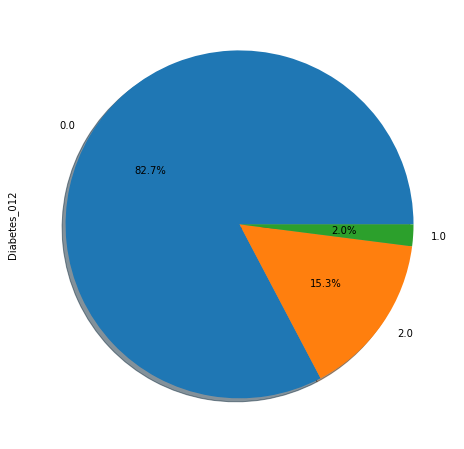

In [5]:
# Approach 1 : Applying Machine Learning Models on (diabete_df_clean)
# Diabete Status
# No Diabete=0
# Pre Diabete=1
# Diabete = 2
diabete_df_clean['Diabetes_012'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [6]:
#Decesion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn import metrics

In [7]:
y= diabete_df_clean['Diabetes_012']
x = diabete_df_clean.drop('Diabetes_012', axis=1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)
print("Accuracy using DecisionTree:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy using DecisionTree: 74.1062297364928 %


In [9]:
#Naive-Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [10]:
y= diabete_df_clean['Diabetes_012']
x = diabete_df_clean.drop('Diabetes_012', axis=1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1)
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [12]:
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)
print("Naive-Bayes:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Naive-Bayes: 73.66233653197554 %


In [13]:
#Use adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
x = diabete_df_clean.drop('Diabetes_012', axis=1)
y= diabete_df_clean['Diabetes_012']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [16]:
model = Adaboost_Classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy: 83.40320591861898 %


In [17]:
#Until Now, I used 3 MODELS
#Decesion tree=74.13 %, 
#NaiveBayes=73.6%
#Adaboosting=83.2%
#The max Model was Related to Adaboosting with 83.21 Percent Accuracy
#####################################################################
#The Second approach is to use a dataframe which (pre-diabete/diabete/no-diabete) observations are equal
#And investigate the Models

In [18]:
#Second Approch
#Having the same number of observations in each category and analyze it
diabete_df_clean

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229776,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
229778,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
229779,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [19]:
#Creating New DataFrame Containing Only Observations with Pre Diabetes
Prediabete_df=diabete_df_clean[diabete_df_clean['Diabetes_012']==1]
Prediabete_df['Diabetes_012'].value_counts()
#Since it has Only 4629 rows, we want to contain these Observations and create other data frames
#based on these

1.0    4629
Name: Diabetes_012, dtype: int64

In [20]:
#Creating New DataFrame Containing Only Observations with Diabetes
diabete_df_new=diabete_df_clean[diabete_df_clean['Diabetes_012']==2]
diabete_df_new['Diabetes_012'].value_counts()
diabete_df_new

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,2.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,2.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,2.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,2.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229760,2.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
229769,2.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
229771,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
229777,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [21]:
#Random Selecting of the above DataFrame (diabete_df)
diabete_newsample_df = diabete_df_new.sample(n=4629,replace=False)
diabete_newsample_df['Diabetes_012'].value_counts()
diabete_newsample_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
182904,2.0,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,30.0,4.0,0.0,0.0,5.0,4.0,2.0
151999,2.0,1.0,0.0,1.0,37.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,2.0,5.0,0.0,1.0,10.0,6.0,8.0
168229,2.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1.0,0.0,1.0,0.0,13.0,4.0,4.0
51673,2.0,1.0,0.0,1.0,32.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,3.0,2.0,0.0,0.0,1.0,8.0,4.0,3.0
40976,2.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,1.0,1.0,7.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166267,2.0,0.0,1.0,1.0,32.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,3.0,30.0,30.0,1.0,0.0,6.0,4.0,2.0
139300,2.0,1.0,0.0,1.0,36.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,4.0,30.0,0.0,1.0,0.0,8.0,4.0,6.0
216559,2.0,1.0,1.0,1.0,43.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,5.0,0.0,20.0,1.0,1.0,9.0,6.0,1.0
131254,2.0,1.0,1.0,1.0,23.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,0.0,11.0,6.0,4.0


In [22]:
#Creating New DataFrame Containing Only Observations with Non Diabetes
Nondiabete_df=diabete_df_clean[diabete_df_clean['Diabetes_012']==0]
Nondiabete_df['Diabetes_012'].value_counts()
#Random Selecting of the above DataFrame (Nondiabete_df)
Nondiabete_newsample_df = Nondiabete_df.sample(n=4629,replace=False)
Nondiabete_newsample_df['Diabetes_012'].value_counts()
Nondiabete_newsample_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
60432,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,5.0,4.0
177358,0.0,0.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,2.0,0.0,0.0,1.0,7.0,6.0,7.0
61525,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,1.0,0.0,0.0,13.0,4.0,6.0
224020,0.0,0.0,1.0,1.0,32.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,8.0,6.0,8.0
16242,0.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37128,0.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,5.0,0.0,0.0,1.0,4.0,6.0,8.0
208098,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,5.0,8.0
65275,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,11.0,5.0,8.0
193560,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,5.0,15.0,0.0,0.0,9.0,6.0,4.0


In [23]:
#combined_equal_df=pd.merge(Prediabete_df,Nondiabete_newsample_df,diabete_newsample_df,on='Diabete_012')
combined_equal_df = pd.concat([Prediabete_df,diabete_newsample_df,Nondiabete_newsample_df], axis=0, join='inner')

In [24]:
combined_equal_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,13887.0,1.00,0.82,0.0,0.0,1.0,2.0,2.0
HighBP,13887.0,0.59,0.49,0.0,0.0,1.0,1.0,1.0
HighChol,13887.0,0.56,0.50,0.0,0.0,1.0,1.0,1.0
CholCheck,13887.0,0.98,0.15,0.0,1.0,1.0,1.0,1.0
BMI,13887.0,30.32,7.37,13.0,26.0,29.0,34.0,96.0
Smoker,13887.0,0.48,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,13887.0,0.06,0.24,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,13887.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
PhysActivity,13887.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
Fruits,13887.0,0.60,0.49,0.0,0.0,1.0,1.0,1.0


In [25]:
combined_equal_df = combined_equal_df.sample(frac=1).reset_index(drop=True)
combined_equal_df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,5.0,7.0
1,2.0,1.0,1.0,1.0,26.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,3.0,3.0
2,1.0,0.0,1.0,1.0,33.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,11.0,5.0,3.0
3,0.0,1.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,5.0,6.0
4,2.0,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,3.0,2.0,0.0,1.0,9.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13882,2.0,1.0,0.0,1.0,35.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,30.0,30.0,1.0,0.0,10.0,6.0,6.0
13883,1.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,1.0,4.0,3.0,5.0
13884,0.0,0.0,0.0,1.0,37.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,4.0,8.0
13885,1.0,1.0,1.0,1.0,41.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,30.0,0.0,1.0,0.0,8.0,4.0,4.0


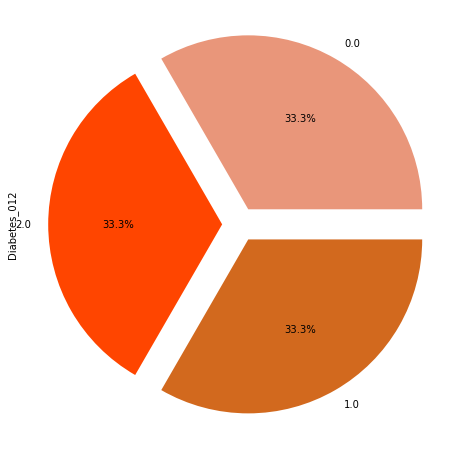

In [26]:
colors=['darksalmon', 'orangered','chocolate']
combined_equal_df['Diabetes_012'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',colors=colors,shadow=False,figsize=  (10,8))
plt.show()

In [27]:
#Use adaboosting for new data-frame
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [28]:
x = combined_equal_df.drop('Diabetes_012', axis=1)
y= combined_equal_df['Diabetes_012']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [30]:
model = Adaboost_Classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("The Accuracy Model of Adaboosting:",metrics.accuracy_score(y_test, y_pred)*100, "%")

The Accuracy Model of Adaboosting: 52.13133640552995 %


In [31]:
#Decesion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split  
from sklearn import metrics

In [32]:
x = combined_equal_df.drop('Diabetes_012', axis=1)
y= combined_equal_df['Diabetes_012']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
sum(y_pred == y_test) / len(y_pred)
print("Accuracy using DecisionTree:",metrics.accuracy_score(y_test, y_pred)*100, "%")

Accuracy using DecisionTree: 40.06479481641469 %


In [34]:
#The Accuracy in second approach decreased drammaticaly
#Decision tree:41.6%
#Adaboosting:51.17%


In [35]:
#Approach 3
#Removing PreDiabetes from dataframe (Having only Diabete and NoDiabete) and evaluating the Accuracy prediction
NonPreDiabete_df=diabete_df_clean.drop(diabete_df_clean.index[diabete_df_clean['Diabetes_012'] == 1])
NonPreDiabete_df['Diabetes_012'].value_counts()

0.0    190055
2.0     35097
Name: Diabetes_012, dtype: int64

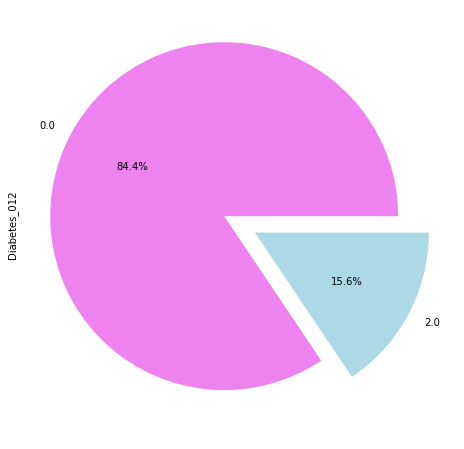

In [36]:
colors=['violet','lightblue']
NonPreDiabete_df['Diabetes_012'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',colors=colors,shadow=False,figsize=  (10,8))
plt.show()

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
x = NonPreDiabete_df.drop('Diabetes_012', axis=1)
y= NonPreDiabete_df['Diabetes_012']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [40]:
model = Adaboost_Classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("The Accuracy Model of Adaboosting:",metrics.accuracy_score(y_test, y_pred)*100, "%")

The Accuracy Model of Adaboosting: 85.18511938601479 %


In [41]:
#The Third Approach shows increasing accuracy around 2 percent, from 83% (dataframe with prediabete) to 85% dataframe without diabete

In [42]:
#Approach 4 ( Convert PreDiabete to Diabete in diabete_df_clean)
#converting PreDiabete to Diabete in diabete_df_clean
#How to replace a value in a column (change 1 to 2 in Diabetes_012 column of DataFrame)
diabete_df_clean['Diabetes_012'].replace(1,2,inplace=True)

C:\Users\ghadi\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


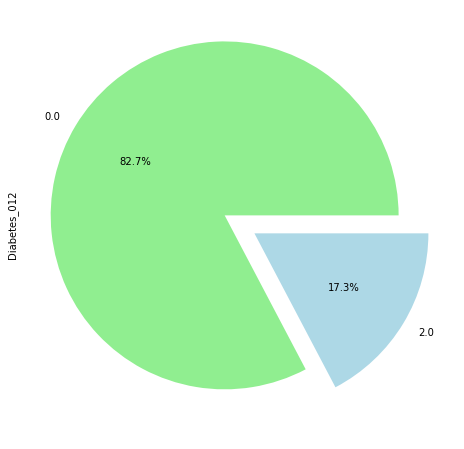

In [43]:
colors=['lightgreen','lightblue']
diabete_df_clean['Diabetes_012'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',colors=colors,shadow=False,figsize=  (10,8))
plt.show()

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [45]:
x = diabete_df_clean.drop('Diabetes_012', axis=1)
y= diabete_df_clean['Diabetes_012']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
Adaboost_Classifier = AdaBoostClassifier(n_estimators=70,learning_rate=1)

In [47]:
model = Adaboost_Classifier.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("The Accuracy Model of Adaboosting:",metrics.accuracy_score(y_test, y_pred)*100, "%")

The Accuracy Model of Adaboosting: 83.78825331615778 %
